In [2]:
hidden_layers = (100,100,100)
img_dimensions = (300,300)
data_type = "unsynth"
rotating = True
flipping = True
add_noise = False
change_hue = False
brightness = False
#classifier = "MLP"
classifier = "CNN"
data = []
test_set_images = []
test_set_labels = []

Loading data + Preprocessing 

In [3]:
import skimage as ski
import numpy as np
import os
from skimage.transform import rescale, resize, downscale_local_mean

if data_type == "unsynth" and data == []:
    data = []
    labels = []
    images = []
    label = 0

    for folder in os.listdir("Datasets/unsynth"):
        # nb = 0
        for file in os.listdir("Datasets/unsynth/" + folder):
            # nb += 1
            # if nb >= 10:
            #     break
            img = ski.io.imread("Datasets/unsynth/" + folder + "/" + file)
            imgResized = resize(img, img_dimensions)
            images.append(imgResized)
            #prep = imgResized.astype(float)
            #prep = imgResized.astype(np.uint8)
            labels.append(label)
        label+=1


In [4]:
import skimage as ski
import numpy as np
import os
from skimage.transform import rescale, resize, downscale_local_mean

if data_type == "synth" and data == []:
    data = []
    labels = []
    images = []
    label = 0

    for folder in os.listdir("Datasets/synth"):
        nb = 0
        for file in os.listdir("Datasets/synth/" + folder):
            if nb >= 200:
                break
            nb += 1
            img = ski.io.imread("Datasets/synth/" + folder + "/" + file)
            imgResized = resize(img, img_dimensions)
            images.append(imgResized)
            #prep = imgResized.astype(float)
            #prep = imgResized.astype(np.uint8)
            labels.append(label)
        label+=1

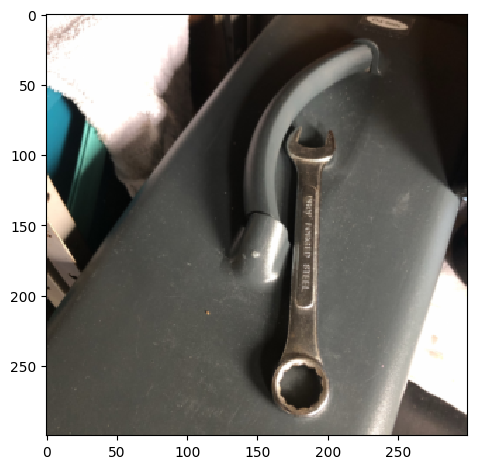

In [5]:
from matplotlib import pyplot as plt
from skimage import io
down_scaled_image = resize(images[0], (300, 300))
io.imshow(down_scaled_image)
plt.show()


Rotating

In [6]:
from skimage import io
from skimage.transform import rotate
from matplotlib import pyplot as plt
from numpy import flipud

if rotating:
    newImages = []
    newLabels = []
    rotations = [0, 90, 180, 270]
    for i in range(len(images)):
        originalImage = images[i]
        for rotation in rotations:
            rotatedImage = rotate(originalImage, rotation)
            newImages.append(rotatedImage)
            newLabels.append(labels[i])
        #newImages.append(np.ndarray.flatten(flipud(rotatedImage)))
        #newLabels.append(labels[i])

    images.extend(newImages)
    labels.extend(newLabels)

In [7]:
if flipping:
    newImages = []
    newLabels = []
    for i in range(len(images)):
        originalImage = images[i]
        newImages.append(flipud(originalImage))
        newLabels.append(labels[i])

    images.extend(newImages)
    labels.extend(newLabels)

Brightness

In [8]:
from skimage import exposure
if brightness:
    newImages = []
    newLabels = []
    gammas = [0.75, 0.875, 1, 1.125, 1.25]
    for i in range(len(images)):
        originalImage = images[i]
        for gamma in gammas:
            brightness_changed_image = exposure.adjust_gamma(originalImage, gamma)
            newImages.append(np.ndarray.flatten(brightness_changed_image))
            newLabels.append(labels[i])
            #newImages.append(np.ndarray.flatten(flipud(rotatedImage)))
            #newLabels.append(labels[i])

    images.extend(newImages)
    labels.extend(newLabels)

Noise

In [9]:
if add_noise:
    noise = np.random.normal(0, 0.2, (len(images), len(images[0]), len(images[0][0]), len(images[0][0][0])))
    noised_images = images + noise
    #noised_data = []
    #for img in noised_images:
    #    img = np.ndarray.flatten(img)
    #    noised_data.append(img)

    labels.extend(labels)
    images.extend(noised_images)

First we make a classifier based on the not augmented data:

In [10]:
len(images)

2030

In [11]:
if classifier == "MLP":
    for img in images:
        data.append(np.ndarray.flatten(img))

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
if classifier == "MLP":
    trainData, testData, trainLabel, testLabel = train_test_split(data, labels, test_size=0.2, random_state=2056621)

    clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(100, 100, 100), random_state=2056621, max_iter=300, verbose=True)
    clf.fit(trainData, trainLabel)

    predLabel = clf.predict(testData)

    

In [13]:
if classifier == "MLP":
    classification_report(testLabel, predLabel)

In [14]:
print(len(data))

0


In [15]:
from joblib import dump

if classifier == "MLP":
    dump(clf, 'a.model')

Verslag
-beginnen met trainen normale dataset om gewoon te proberen(na alle images naar 1000, 1000 te doen)
-slechte resultaten zoals verwacht (slechter dan random guesses)
-dan roteren + flippen toegepast -> aantal images maal 8
-paste niet meer in RAM -> disk schrijven wat het heel traag maakte
-alleen roteren past het wel in RAM + kleinere images (1000, 1000) -> (500, 500)
-hidden layer size ook naar (100, 100, 100, 100)
-dit gaf redelijke resultaten, max iterations stond nog op 50 wel + warning niet convergeren
-na dit weg te laten convergeerde het met wat betere resultaten
-200 200 200 200 gaf niet meteen betere resultaten dan 100 100 100 100, accuracy was zelfs omlaag
-nu proberen we om aantal dingen te veranderen (changing brightness, hue, noise, and randomly combining all previous methods)

-brightness gaf goede resultaten, maar wss overfitten (5x bijna dezelfde images)
-normaliseren images doen we nu (delen door 255, helpt overfitten tegen te gaan en sneller convergeren)
-Gustavo had gezegd: training op gegenereerde en testen op echte images
-noise geeft goede resultaten (we gebruiken maar 100 100)
-size images naar (300, 300), zagen er nog altijd herkenbaar uit
-trainen op synthetic data als trainset en normale data als testset geeft slechte resultaten (1/4 accuracy = gokken)
-ook eerst problemen met RGB(a) wat niet hetzelfde formaat was tussen synthetic & unsynth


Volgende stappen:
-Trainen op synthetic images
-


In [16]:
if data_type == "synth" and test_set_images != []:
    test_set_images = []
    test_set_labels = []
    label = 0
    for folder in os.listdir("Datasets/unsynth"):
        # nb = 0
        for file in os.listdir("Datasets/unsynth/" + folder):
            # nb += 1
            # if nb >= 10:
            #     break
            img = ski.io.imread("Datasets/unsynth/" + folder + "/" + file)
            imgResized = resize(img, (300,300))
            test_set_images.append(imgResized)
            #prep = imgResized.astype(float)
            #prep = imgResized.astype(np.uint8)
            test_set_labels.append(label)
        label+=1

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

if data_type == "synth":
    def RGBA_to_RGB(images):
        return np.delete(arr=images, axis=3, obj=3)

    images = RGBA_to_RGB(images)
    trainData = []
    for image in images:
        trainData.append(np.ndarray.flatten(image) / 255)
    trainLabel = labels
    testData = []

    for image in test_set_images:
        testData.append(np.ndarray.flatten(image) / 255)
    testLabel = test_set_labels

    lf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(100, 100, 100), random_state=2056621, max_iter=300, verbose=True)
    clf.fit(trainData, trainLabel)

    predLabel = clf.predict(testData)

    classification_report(testLabel, predLabel)

In [18]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets, layers, models

if classifier == "CNN":
    model = models.Sequential()
    model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(300, 300, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(100, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(100, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(hidden_layers[0], activation='relu'))
    model.add(layers.Dense(hidden_layers[1], activation='relu'))
    model.add(layers.Dense(hidden_layers[2], activation='relu'))
    model.add(layers.Dense(4))

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    trainData, testData, trainLabel, testLabel = train_test_split(images, labels, test_size=0.2, random_state=2056621)
    history = model.fit(np.asarray(trainData), np.asarray(trainLabel), epochs=10)

    test_loss, test_acc = model.evaluate(np.asarray(testData), np.asarray(testLabel), verbose=2)
    print("Accuracy:" + str(test_acc))







Epoch 1/10


51/51 [==============================] - 126s 2s/step - loss: 1.4629 - accuracy: 0.2913
Epoch 2/10
51/51 [==============================] - 125s 2s/step - loss: 1.3137 - accuracy: 0.4027
Epoch 3/10
51/51 [==============================] - 134s 3s/step - loss: 1.1916 - accuracy: 0.4778
Epoch 4/10
51/51 [==============================] - 138s 3s/step - loss: 1.0551 - accuracy: 0.5733
Epoch 5/10
51/51 [==============================] - 135s 3s/step - loss: 0.6843 - accuracy: 0.7414
Epoch 6/10
51/51 [==============================] - 135s 3s/step - loss: 0.2976 - accuracy: 0.9089
Epoch 7/10
51/51 [==============================] - 135s 3s/step - loss: 0.0703 - accuracy: 0.9828
Epoch 8/10
51/51 [==============================] - 147s 3s/step - loss: 0.0742 - accuracy: 0.9908
Epoch 9/10
51/51 [==============================] - 138s 3s/step - loss: 0.2675 - accuracy: 0.9378
Epoch 10/10
51/51 [==============================] - 137s 3s/step - loss: 0.0679 - accuracy: 0.9914
13/

In [19]:
print(len(images[1015]))

300


In [20]:
inputString = "              precision    recall  f1-score   support\n\n           0       0.32      0.17      0.23        52\n           1       0.28      0.29      0.29        51\n           2       0.16      0.08      0.11        50\n           3       0.24      0.46      0.31        50\n\n    accuracy                           0.25       203\n   macro avg       0.25      0.25      0.23       203\nweighted avg       0.25      0.25      0.23       203\n"
parsed_string = inputString.split('\n')
for line in parsed_string:
    print(line)

              precision    recall  f1-score   support

           0       0.32      0.17      0.23        52
           1       0.28      0.29      0.29        51
           2       0.16      0.08      0.11        50
           3       0.24      0.46      0.31        50

    accuracy                           0.25       203
   macro avg       0.25      0.25      0.23       203
weighted avg       0.25      0.25      0.23       203

